In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import rail
import qp
from rail.core.data import TableHandle
from rail.core.stage import RailStage

from rail_inception import Inform_Inception, Inception

In [2]:
DS = RailStage.data_store
DS.__class__.allow_overwrite = True

In [3]:
inc_dict = dict(trainfrac=0.75,
                epoch=25,
                hdf5_groupname='photometry')

In [4]:
inform = Inform_Inception.make_stage(name='Inform_Inception', model='demo_inc.pkl', **inc_dict)

In [5]:
from rail.core.utils import RAILDIR
trainFile = os.path.join(RAILDIR, '/global/cfs/cdirs/lsst/groups/PZ/valentin_image_data_temp/img_30k.npy')
#training_data = DS.read_file("training_data", TableHandle, trainFile)

In [6]:
img = np.load('/global/cfs/cdirs/lsst/groups/PZ/valentin_image_data_temp/img_30k.npy')
z = np.load('/global/cfs/cdirs/lsst/groups/PZ/valentin_image_data_temp/z_30k.npy')

training_data = img[:20000], z[:20000]
test_data = img[20000:], z[20000:]

Inserting handle into data store.  input: None, Inform_Inception
[0.027201409605145454, 0.015744634598493575, 0.026313209802657365, 0.042334038832783694, 0.13110969055742025]
Split into 15000 training and 5000 validation samples
Model training:
Epoch 1/25
234/234 [==============================] - 12s 36ms/step - loss: 0.1316 - val_loss: 0.0027 - lr: 0.0010
Epoch 2/25
234/234 [==============================] - 8s 32ms/step - loss: 0.0016 - val_loss: 0.0015 - lr: 9.0000e-04
Epoch 3/25
234/234 [==============================] - 7s 32ms/step - loss: 0.0015 - val_loss: 0.0013 - lr: 8.1000e-04
Epoch 4/25
234/234 [==============================] - 8s 32ms/step - loss: 0.0012 - val_loss: 0.0011 - lr: 7.2900e-04
Epoch 5/25
234/234 [==============================] - 8s 32ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 6.5610e-04
Epoch 6/25
234/234 [==============================] - 8s 32ms/step - loss: 9.6885e-04 - val_loss: 9.9724e-04 - lr: 5.9049e-04
Epoch 7/25
234/234 [======================

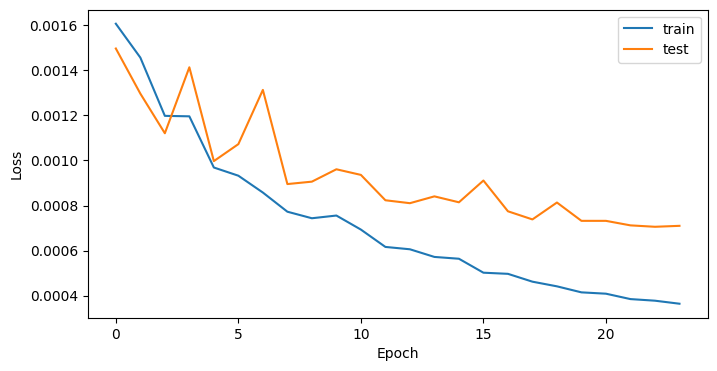

Inserting handle into data store.  model_Inform_Inception: inprogress_demo_inc.pkl, Inform_Inception


INFO:tensorflow:Assets written to: ram://0a4e5c69-c2aa-4a52-b665-360a106d93f3/assets


INFO:tensorflow:Assets written to: ram://0a4e5c69-c2aa-4a52-b665-360a106d93f3/assets


In [7]:
inform.inform(training_data)

In [8]:
incept = Inception.make_stage(name='Inception', hdf5_groupname='photometry',
                              model=inform.get_handle('model'))

625/625 [==============================] - 4s 6ms/step
Prediction bias: -0.0013


<IPython.core.display.Latex object>

Outlier fraction: 1.45%


KeyError: 'Inception failed to get data by handle output_Inception, associated to output'

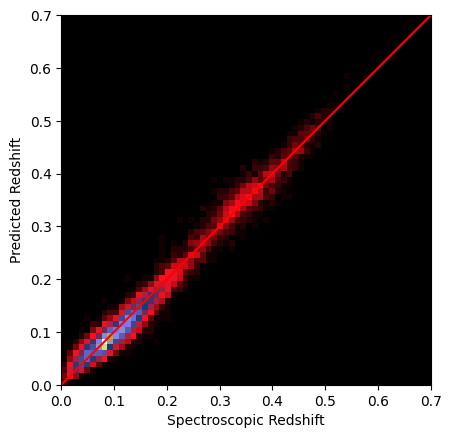

In [9]:
results = incept.estimate(test_data)